In [ ]:
### First we have downloaded a net CDF from the Copernicus Data Store: https://cds.climate.copernicus.eu

In [64]:
file = '/Users/gbenz/Downloads/tx10pETCCDI_mon_HadGEM3-GC31-LL_historical_r1i1p1f3_b1981-2010_v20190624_185001-201412_v2-0.nc'

In [1]:
import pandas as pd
import xarray as xr
from rasterstats import zonal_stats
import numpy as np

from utils.unzip import unzip_etccdi_package
from utils.correct_longitude import transform_longitudinal_values
from utils.give_metadata import give_metadata
from utils.etccdi_to_pg import generate_etccdi_temporal_tables
from utils.temporal_index import find_etccdi_timeindex


## Access with Copernicus Data Store API:

#### Objective by Oct. 30 is to have this process begin by retreiving (predefined and approved) ETCCDI data parameters from an API

- Works on Mon 28 GB

The proceeding code provides a correct output but requires a unique user API key. This cannot be simplified much further.

The desirable output is to exclusively change:
- 'variable' 
- product_type
- period
#### ------------------
- start_year = '1995'
- start_month = '01'
- end_year = '2000'
- end_month = '12'

Then if you select 'cold days' a decision tree will be printed with the optional parameters that could be selected for product type and period
Other parameters will be kept standard. 

In [2]:
import cdsapi

dataset = "sis-extreme-indices-cmip6"
request = {
    "variable": ["cold_days"],
    "product_type": ["base_period_1961_1990"], 
    "model": ["hadgem3_gc31_ll"], # this is linked to ensemble member
    "ensemble_member": ["r1i1p1f3"],
    "experiment": ["ssp1_2_6"], #this is linked to period
    "temporal_aggregation": ["monthly"],
    "period": ["201501_210012"],
    "version": ["2_0"],
    'data_format': 'netcdf'

}

# Extract the desired elements from the request dictionary
variable = request["variable"][0]
temporal_aggregation = request["temporal_aggregation"][0]
period = request["period"][0]

# Concatenate them with an underscore or any other separator you prefer
zip_file_name = f"{variable}_{temporal_aggregation}_{period}.zip"

client = cdsapi.Client()
client.retrieve(dataset, request, target=zip_file_name)


2024-10-28 11:06:11,585 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-28 11:06:11,585 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informative page](https://confluence.ecmwf.int/x/uINmFw) for guidance.
2024-10-28 11:06:11,586 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-10-28 11:06:11,586 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-10-28 11:06:11,587 WARNING [2024-06-16T

d101c0bf89967b6f33f6377578a0fac5.zip:   0%|          | 0.00/109M [00:00<?, ?B/s]

'cold_days_monthly_201501_210012.zip'

In [3]:
netcdf_file, etccdi_index = unzip_etccdi_package(zip_file_name)

tx10pETCCDI
Extracted file names: tx10pETCCDI_mon_HadGEM3-GC31-LL_ssp126_r1i1p1f3_b1961-1990_v20200114_201501-210012_v2-0.nc


### Report Metadata from the selected ETTCDI netCDF file:

Move the pg shapefile to the github repo so this can be accessed without references to local paths

Accomplishes:
- checks to ensure the correct netcdf file is being processed
- provides spatial and temporal metadata

From preprocessing, we know that the ETCCDI climate data is not packaged in a desirable format, that is, the original longitudinal range is: 0.9375 to 359.0625
- Adjust the Longitude range 
- save an 'adjusted netcdf' file.


28-10 -- What would perhaps be most desirable is to first transform, then, report metadata with two seperate functions.

In [5]:
etccdi = transform_longitudinal_values(etccdi_index, netcdf_file)

The variable 'tx10pETCCDI' was found in the file path and the world continues to spin.
Original Latitude range: -89.375 to 89.375
Original Longitude range: 0.9375 to 359.0625
Adjusted Longitude range: -179.0625 to 179.0625
Adjusted dataset saved to: /Users/gbenz/Downloads/adjusted_tx10pETCCDI_mon_HadGEM3-GC31-LL_ssp126_r1i1p1f3_b1961-1990_v20200114_201501-210012_v2-0.nc.nc


In [6]:
give_metadata(etccdi)

Latitude range: -89.375 to 89.375
Longitude range: -179.0625 to 179.0625
Latitude resolution: 1.25
Longitude resolution: 1.875
Global Metadata:
CDI: Climate Data Interface version 1.8.0 (http://mpimet.mpg.de/cdi)
history: Tue Nov 24 09:31:53 2020: cdo mergetime tasmax_day_HadGEM3-GC31-LL_ssp126_r1i1p1f3_gn_20150101-20491230.nc tasmax_day_HadGEM3-GC31-LL_ssp126_r1i1p1f3_gn_20500101-21001230.nc ./merged/tasmax_day_HadGEM3-GC31-LL_ssp126_r1i1p1f3_gn_20150101-21001230.nc
2020-01-13T09:55:40Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.;
2020-01-13T09:53:59Z MIP Convert v1.2.3, Python v2.7.12, Iris v1.13.0, Numpy v1.13.3, netcdftime v1.4.1.
source: HadGEM3-GC31-LL (2016): 
aerosol: UKCA-GLOMAP-mode
atmos: MetUM-HadGEM3-GA7.1 (N96; 192 x 144 longitude/latitude; 85 levels; top level 85 km)
atmosChem: none
land: JULES-HadGEM3-GL7.1
landIce: none
ocean: NEMO-HadGEM3-GO6.0 (eORCA1 tripolar primarily 1 deg with meridional refinement down to 1/3 degree in the 

In [8]:
#-----------------------------------------------------------
# Define Start Year & Month
#-----------------------------------------------------------
start_year = '2015'
start_month = '01'
#-----------------------------------------------------------
# Define End Year & Month
end_year = '2020'
end_month = '12'
#-----------------------------------------------------------
#-----------------------------------------------------------
# Establish Start and End index values:
start_index_val =  find_etccdi_timeindex(start_year, start_month, etccdi)
end_index_val = find_etccdi_timeindex(end_year, end_month, etccdi)
#-----------------------------------------------------------
print(f'The start index is: {start_index_val}')
print(f'The end index is: {end_index_val}')
#-----------------------------------------------------------
index_list = list(range(start_index_val, end_index_val + 1))
#-----------------------------------------------------------

Index of 01 data for year 2015: 0
Validation: Found data for Year: 2015, Month: 01 at index 0.
Index of 12 data for year 2020: 71
Validation: Found data for Year: 2020, Month: 12 at index 71.
The start index is: 0
The end index is: 71


### Testing on the first n elements:

In [21]:
sub_index = index_list[:2]

time_length_subset = len(sub_index)
time_length = len(index_list)

print(time_length_subset)
print(time_length)


2
72


### Puts it all together

Parameters:
1. references the sub_index which supplies the list (or sublist) of indexes to iterate over. Index specifically references time. This can be confusing because the ETCCDI variables are themselves climate indices.
2. Creates a single geotiff from the current time selection. We do this because the NetCDF itself is not a format that can be incorporated into rigorous analysis so as we iterate through the time series we convert the working item to a geotiff which is a format that can be operated on.


#### Parameters:

1. NetCDF file
2. (TEMPORAL) sub_index or full index (specify index to loop over)
3. etccdi index ex(tx10pETCCDI)


ADF -- Decision to just save to ONE WORKING raster that will continously be rewritten 
rationale: The purpose of having unique tifs is to visualize holes in the data. However, this is not worth the space. If holes appear in the tabular dataset, a new geotiff corresponding to that month / year can quickly be produced!

ADF -- Rationalize why this is best:
    # Resample the raster data to the new resolution
    resampled_raster = raster_data.rio.reproject(
        raster_data.rio.crs,
        shape=(
            int(raster_data.shape[1] * 10),  # Increase number of rows by a factor of 10
            int(raster_data.shape[2] * 10)   # Increase number of columns by a factor of 10
        ),
        resampling=Resampling.bilinear  # Use the correct resampling method
    )


### Params:

- time_index_list,
- netcdf, climate_index, 
- shapefile_path


In [10]:
generate_etccdi_temporal_tables(sub_index, etccdi, etccdi_index, '/Users/gbenz/Downloads/pg_extent/pgm_viewser_extent.shp')

0
Year: 2015-01-15 12:00:00
GeoTIFF saved at: working_etccdi_file.tif
Resampled GeoTIFF saved at: working_etccdi_file_resampled.tif
1
Year: 2015-02-15 12:00:00
GeoTIFF saved at: working_etccdi_file.tif
Resampled GeoTIFF saved at: working_etccdi_file_resampled.tif
Final DataFrame saved to: etccdi_out_files/tx10pETCCDI_2015_01__2015_02.csv


### Review:

#### Validate completeness of the output index at PG resolution:

Temporally: check that all total number of time periods match
- Spatially: Full extent of PG (for each temporal unit!)

How to do this:

1. Load the 'compiled' etccdi index .csv
2. check for null values

Total length should be: X

check length of temporal units should be: X (dependent on input parameters)
check length of spatial units should be: X

3. Plot the data


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_average_tx10pETCCDI(dataframe):
    # Group by 'date' and calculate the average 'tx10pETCCDI' for each date
    monthly_avg = dataframe.groupby('date')['tx10pETCCDI'].mean().reset_index()
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_avg['date'], monthly_avg['tx10pETCCDI'], marker='o', linestyle='-')
    plt.title('Average tx10pETCCDI by Year-Month')
    plt.xlabel('Date')
    plt.ylabel('Average tx10pETCCDI')
    plt.grid(True)
    plt.show()

# Assuming your DataFrame is named df


In [27]:
import geopandas as gpd

# Specify the path to your shapefile or other spatial data file
file_path = '/Users/gbenz/Downloads/pg_extent/pgm_viewser_extent.shp'

# Load the data into a GeoDataFrame
gdf = gpd.read_file(file_path)

spatial_extent = len(pd.unique(gdf['gid']))

This prints a summary of Null values:



gid            0
year           0
month          0
date           0
tx10pETCCDI    0
dtype: int64


Summary of temporal and spatial units:

This dataset expects to see 72 and found 2
This dataset expects to see 13110 and found 13110

Average over time to expose any temporal gaps


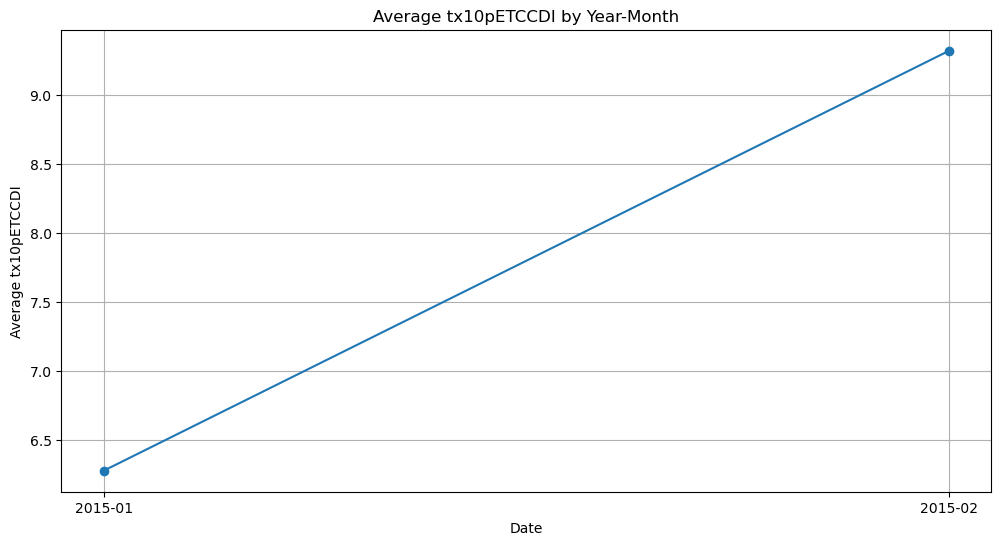

In [33]:
validate_etccdi = pd.read_csv('/Users/gbenz/Documents/Climate Data/climate_extremes/etccdi_out_files/tx10pETCCDI_2015_01__2015_02.csv')
validate_etccdi['date'] = validate_etccdi['year'].astype(str) + '-' + validate_etccdi['month'].astype(str).str.zfill(2)

etccdi_time_length = len(pd.unique(validate_etccdi['date']))
etccdi_spatial_length = len(pd.unique(validate_etccdi['gid']))

#-------------------------------------------------------------------------------------------------------------------------------------------------
# Report null values:

# Specify the columns to check for null values
columns_to_check = ['gid', 'year', 'month', 'date', 'tx10pETCCDI']
print('This prints a summary of Null values:')
# Count null values in the specified columns
null_counts = validate_etccdi[columns_to_check].isnull().sum()
#-------------------------------------------------------------------------------------------------------------------------------------------------
print()
display(null_counts)

print()
print('Summary of temporal and spatial units:')
print()
print(f'This dataset expects to see {time_length} and found {etccdi_time_length}')
print(f'This dataset expects to see {spatial_extent} and found {etccdi_spatial_length}')
print()
print('Average over time to expose any temporal gaps')
plot_monthly_average_tx10pETCCDI(validate_etccdi)

### Resample to Fine (Granular) Pixel 

Parameters to consider: 
1. What is an appropriate resolution
2. What is the most appropriate resampling method
